##  1. Problem Statement

The current process suffers from the following problems:

* One issue is that only about **10%** of the **customers** do enough trades for earnings after discounts to be profitable.

* The company wants to figure out, which are those 10% customers so that it can selectively offer them a **discount**.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

### Role

* Given datasets of past customers and their status (Revenue Grid 1 or 2).
* Task is to build a classification model using the datasets.
* Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverables

* Deliverable: **Predict whether a customer belongs to a high net worth or low net worth group.**
* Machine Learning Task: **Classification**
* Target Variable: **Status (high net worth (1) / low net worth (2))**
* Win Condition: **N/A (best possible model)**


## 2. Importing Packages

In [178]:
import numpy as np                     
#import dtale                                       # Auto EDA module
#import sweetviz as sv
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
#pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

from pandas_profiling import ProfileReport  #for auto EDA report

# For Random seed values
from random import randint

import warnings
warnings.filterwarnings('ignore')  

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

# Install and update plotly using this command to the latest version (higher than version 4.0.0)

#!pip install plotly --upgrade
import plotly.graph_objs as go

In [179]:
df_train = pd.read_csv('existing_base_train.csv') #importing dataset

# Dataset Feature Description

### Description of the Dataset :

|Column Name	                              | Description                                                                   |
| --------------------------------------------|------------------------------------------------------------------------------:| 
| REF_NO	                                  | Reference Number of the customer.                                             |
| children	                                  | Number of children each customer has.                                         | 
| Age_band	                                  | Age Group to which the customer belongs.                                      |
| status	                                  | Marital Status of the customer.                                               |
| occupation	                              | Job or profession of the customer.                                            |
| occupation_partner	                      | Job or profession of the customer's partner.                                  |
| home_status	                              | Home Status of the customers.                                                 |
| family_income	                              | Income Range of the customer's family.                                        |
| self_employed	                              | Whether self-employed or not.                                                 |
| self_employed_partner	                      | Whether the partner self-employed or not.                                     |
| year_last_moved	                          | Moving Year from the last location of the customer.                           |
| TVarea	                                  | Television Region of the customer.                                            |
| post_code	                                  | Postal Code of the customer.                                                  |
| post_area	                                  | Postal Area of the customer.                                                  |  | Average_Credit_Card_Transaction	           | Average Credit Card Transaction per year by the customer.                     |
| Balance_Transfer	                          | Transfer of the Balance in an account to another account by the customer.     |
| Term_Deposit	                              | Cash Investment Help at Financial Institute provided to the customer.         |
| Life_Insurance	                          | Basic Life Insurance Coverage of the customer.                                |
| Medical_Insurance	                          | Medical Insurance Coverage of the customer.                                   |
| Average_A/C_Balance	                      | Average Balance in the account of the customer.                               |
| Personal_Loan	                              | Amount of Personal Loan taken by the customer.                                |
| Investment_in_Mutual_Fund	                  | Amount Invested in Mutual Funds by the customer.                              |
| Investment_Tax_Saving_Bond	              | Amount Invested in Tax Saving Bond by the customer.                           |
| Home_Loan	                                  | Amount of Home Loan taken by the customer.                                    |
| Online_Purchase_Amount	                  | Amount spent by the customer on online purchases.                             |
| gender	                                  | Gender of the customer.                                                       |
| region	                                  | Religion of the customer.                                                     | 
| Investment_in_Commudity	                  | Amount Invested in Commodity by the customer.                                 |
| Investment_in_Equity	                      | Amount Invested in Equity by the customer.                                    |
| Investment_in_Derivative	                  | Amount Invested in Derivatives by the customer.                               |
| Portfolio_Balance	                          | Balanced Investment Strategy of the customer.                                 |
| **Revenue_Grid**	                          | **Grid report of the customers.**                                             |

In [180]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [181]:
print('Data Shape',df_train.shape)
df_train.head(5)

Data Shape (8124, 32)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


From the above we could observe there are no **missing values** present

- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **8124 samples (rows)** and **31 columns** in the dataframe.
  
  - There are **3 columns** with a **numeric** datatype and **13 columns** with an **object** datatype & **15 columns** with an **float** datatype
  
  - There are **0 missing** values in the data.

In [182]:
print('Describe feature length', len(df_train.describe().columns))
df_train.describe()

Describe feature length 18


,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


### Numerical  Data Distribution

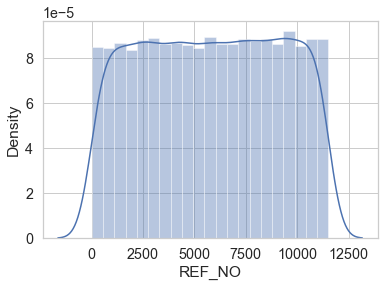

Mean: 5797.3433037912355 is less then median: 5811.5, hence REF_NO is Negatively skewed
-------------------------------


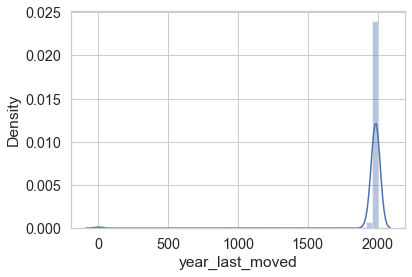

Mean: 1967.8769079271294 is less then median: 1988.0, hence year_last_moved is Negatively skewed
-------------------------------


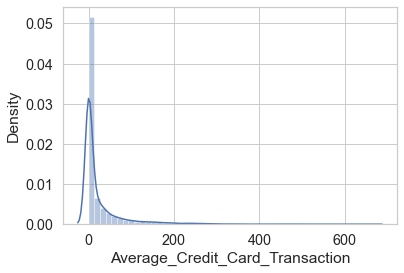

Mean: 23.25109428852797 is greater then median: 0.0, hence Average_Credit_Card_Transaction is Positively skewed
-------------------------------


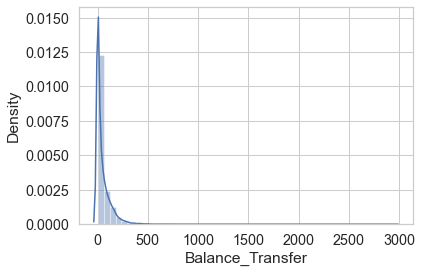

Mean: 46.082922205808906 is greater then median: 17.485, hence Balance_Transfer is Positively skewed
-------------------------------


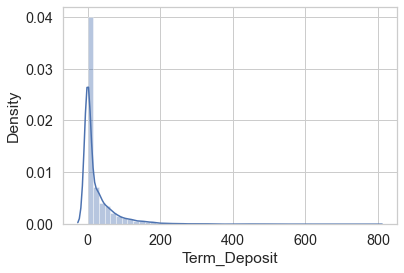

Mean: 27.28464918759242 is greater then median: 0.0, hence Term_Deposit is Positively skewed
-------------------------------


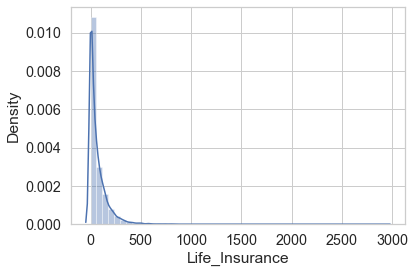

Mean: 65.31793943869839 is greater then median: 31.475, hence Life_Insurance is Positively skewed
-------------------------------


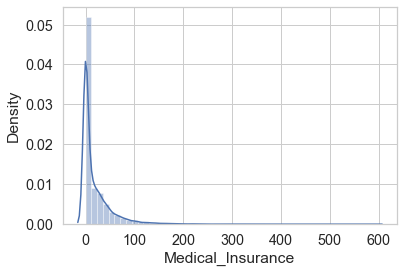

Mean: 18.826195224027764 is greater then median: 0.01, hence Medical_Insurance is Positively skewed
-------------------------------


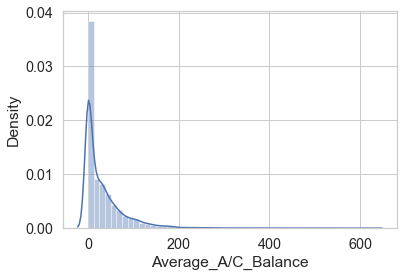

Mean: 31.83802314130987 is greater then median: 14.98, hence Average_A/C_Balance is Positively skewed
-------------------------------


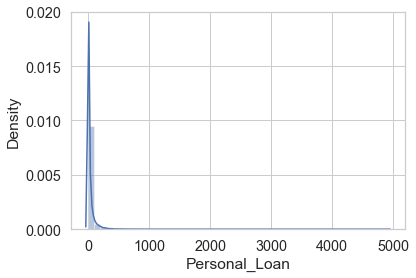

Mean: 25.41582964057122 is greater then median: 0.0, hence Personal_Loan is Positively skewed
-------------------------------


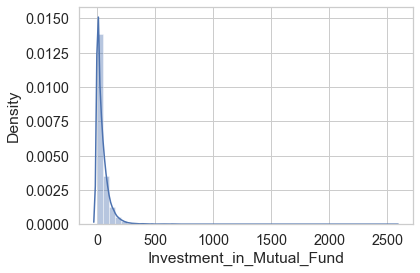

Mean: 41.72362752338704 is greater then median: 23.48, hence Investment_in_Mutual_Fund is Positively skewed
-------------------------------


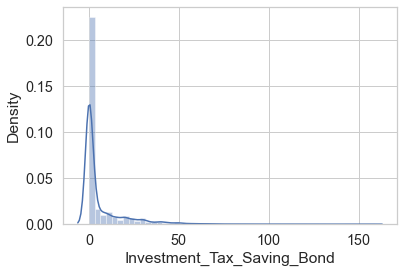

Mean: 6.057246430329916 is greater then median: 0.0, hence Investment_Tax_Saving_Bond is Positively skewed
-------------------------------


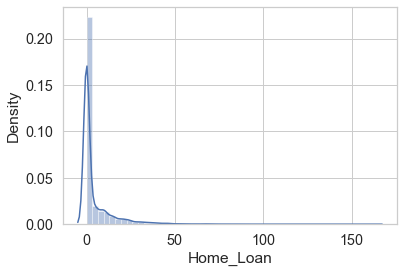

Mean: 4.416914081733174 is greater then median: 0.0, hence Home_Loan is Positively skewed
-------------------------------


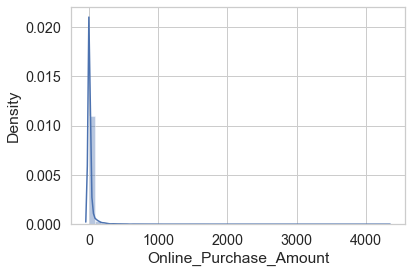

Mean: 19.19865829640577 is greater then median: 0.0, hence Online_Purchase_Amount is Positively skewed
-------------------------------


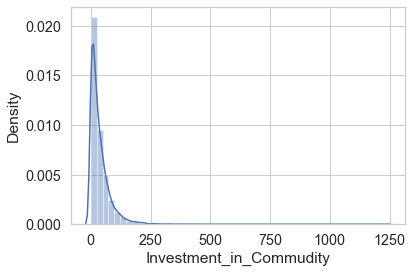

Mean: 36.152748645987344 is greater then median: 23.59, hence Investment_in_Commudity is Positively skewed
-------------------------------


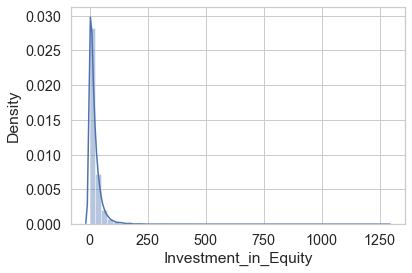

Mean: 21.44247538158561 is greater then median: 12.82, hence Investment_in_Equity is Positively skewed
-------------------------------


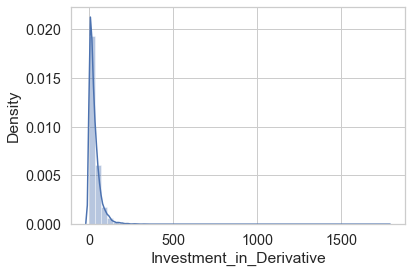

Mean: 31.530652387986265 is greater then median: 21.14, hence Investment_in_Derivative is Positively skewed
-------------------------------


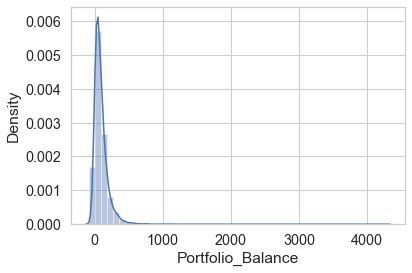

Mean: 89.3533677991136 is greater then median: 65.56, hence Portfolio_Balance is Positively skewed
-------------------------------


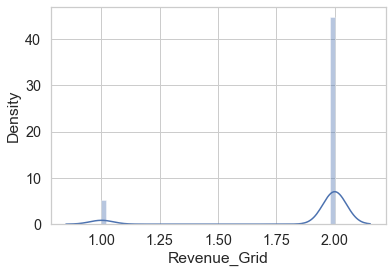

Mean: 1.8941408173313639 is less then median: 2.0, hence Revenue_Grid is Negatively skewed
-------------------------------


In [183]:
for col in df_train.describe().columns:
    if df_train[col].mean() > df_train[col].median():
        ax=sns.distplot(df_train[col])
        plt.show()
        print('Mean: {} is greater then median: {}, hence {} is Positively skewed'.format(df_train[col].mean(),df_train[col].median(),col))
        print('-------------------------------')
    elif df_train[col].mean() < df_train[col].median():
        ax=sns.distplot(df_train[col])
        plt.show()
        print('Mean: {} is less then median: {}, hence {} is Negatively skewed'.format(df_train[col].mean(),df_train[col].median(),col))
        print('-------------------------------')
    else :
        ax=sns.distplot(df_train[col])
        plt.show()
        print('Mean: {} is equals  median: {}, hence {} is Normally distributed'.format(df_train[col].mean(),df_train[col].median(),col))
        
     
        


### Categorical Data Distribution

In [184]:
cat_columns =[]
for col in df_train.columns.values:
    if (df_train[col].dtype=='object'):
        cat_columns.append(col)

print('Total Categorical Features : {}'.format(len(cat_columns)))        
print('Categorical Features : {}'.format(cat_columns))

# remove postcode and post_area
cat_columns.remove('post_code')
cat_columns.remove('post_area')

Total Categorical Features : 14
Categorical Features : ['children', 'age_band', 'status', 'occupation', 'occupation_partner', 'home_status', 'family_income', 'self_employed', 'self_employed_partner', 'TVarea', 'post_code', 'post_area', 'gender', 'region']


In [185]:
#check number of classes in each categorical feature 

for col in cat_columns:
    print('No of classes in {} :  {}'.format(col,df_train[col].nunique()))

No of classes in children :  5
No of classes in age_band :  13
No of classes in status :  5
No of classes in occupation :  9
No of classes in occupation_partner :  9
No of classes in home_status :  5
No of classes in family_income :  13
No of classes in self_employed :  2
No of classes in self_employed_partner :  2
No of classes in TVarea :  14
No of classes in gender :  3
No of classes in region :  13


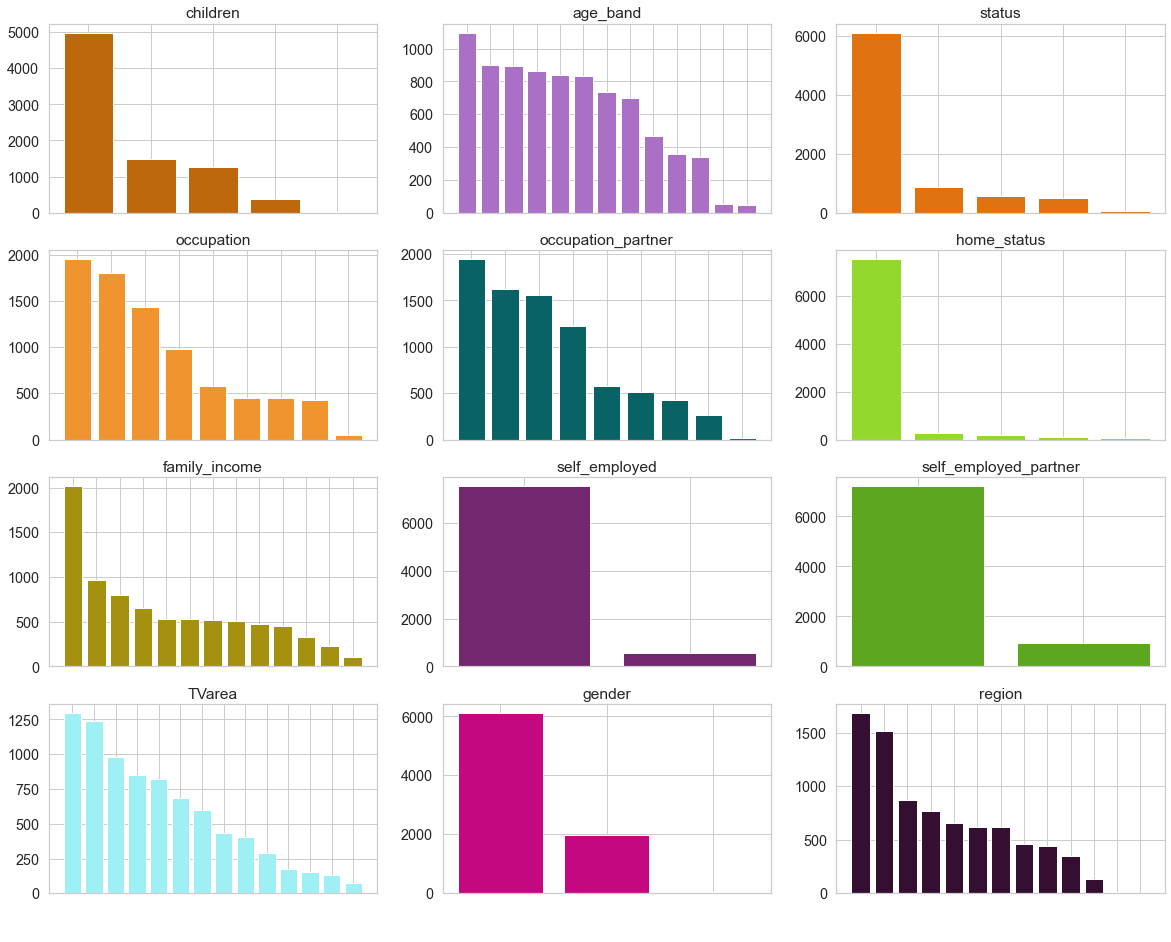

In [186]:
fig, axes=plt.subplots(nrows=4, ncols=3, sharex=False, figsize=(20,16))

colors =[]
for i in range(14):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


for ax, col, color in zip(axes.flat, cat_columns, colors):
    #print(ax, col, color)
    ax.bar(x= df_train[col].value_counts().index, height=df_train[col].value_counts(),color=color )
    ax.set_title(col)
    ax.set_xlabel('  ')
    ax.set_xticklabels(labels= ' ')
    ax.grid(True)
    
    
    
    

In [187]:
#df_train.nunique(axis=0).sort_values(ascending=False)# returns the number of unique values for each variable.

In [188]:
#profile = ProfileReport(df_train, title="Pandas Profiling Report")
#profile.to_file("EDA_tain.html")

In [189]:
df_train.Revenue_Grid.unique() # only two values in the Target variable 

array([2, 1], dtype=int64)

In [190]:
df_train.children.value_counts()

Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64

In [191]:
df_train[df_train['year_last_moved']==0]['year_last_moved'].count() # there are 69 zeros in year_lastmoved column

69

In [192]:
df_train['year_last_moved'].mode()

0    1997
dtype: int64

In [193]:
# replacing zero with most frequest values i.e mode value
df_train.year_last_moved.unique()
year_mode = df_train['year_last_moved'].mode()
df_train['year_last_moved']=df_train['year_last_moved'].replace(0,1997)

In [194]:
df_train.year_last_moved.unique()

array([1981, 1997, 1996, 1990, 1989, 1984, 1986, 1998, 1980, 1950, 1971,
       1995, 1987, 1991, 1973, 1951, 1970, 1993, 1978, 1969, 1983, 1967,
       1985, 1992, 1960, 1994, 1988, 1965, 1937, 1972, 1949, 1904, 1999,
       1958, 1977, 1948, 1974, 1955, 1920, 1982, 1963, 1942, 1962, 1975,
       1968, 1964, 1979, 1966, 1961, 1957, 1976, 1959, 1953, 1935, 1928,
       1939, 1956, 1917, 1911, 1936, 1902, 1954, 1940, 1930, 1929, 1931,
       1906, 1946, 1914, 1910, 1943, 1952, 1944, 1912, 1908, 1947, 1905,
       1938, 1909, 1923, 1922, 1941, 1921, 1945, 1907, 1924, 1901, 1932,
       1927, 1919, 1913, 1903, 1915], dtype=int64)

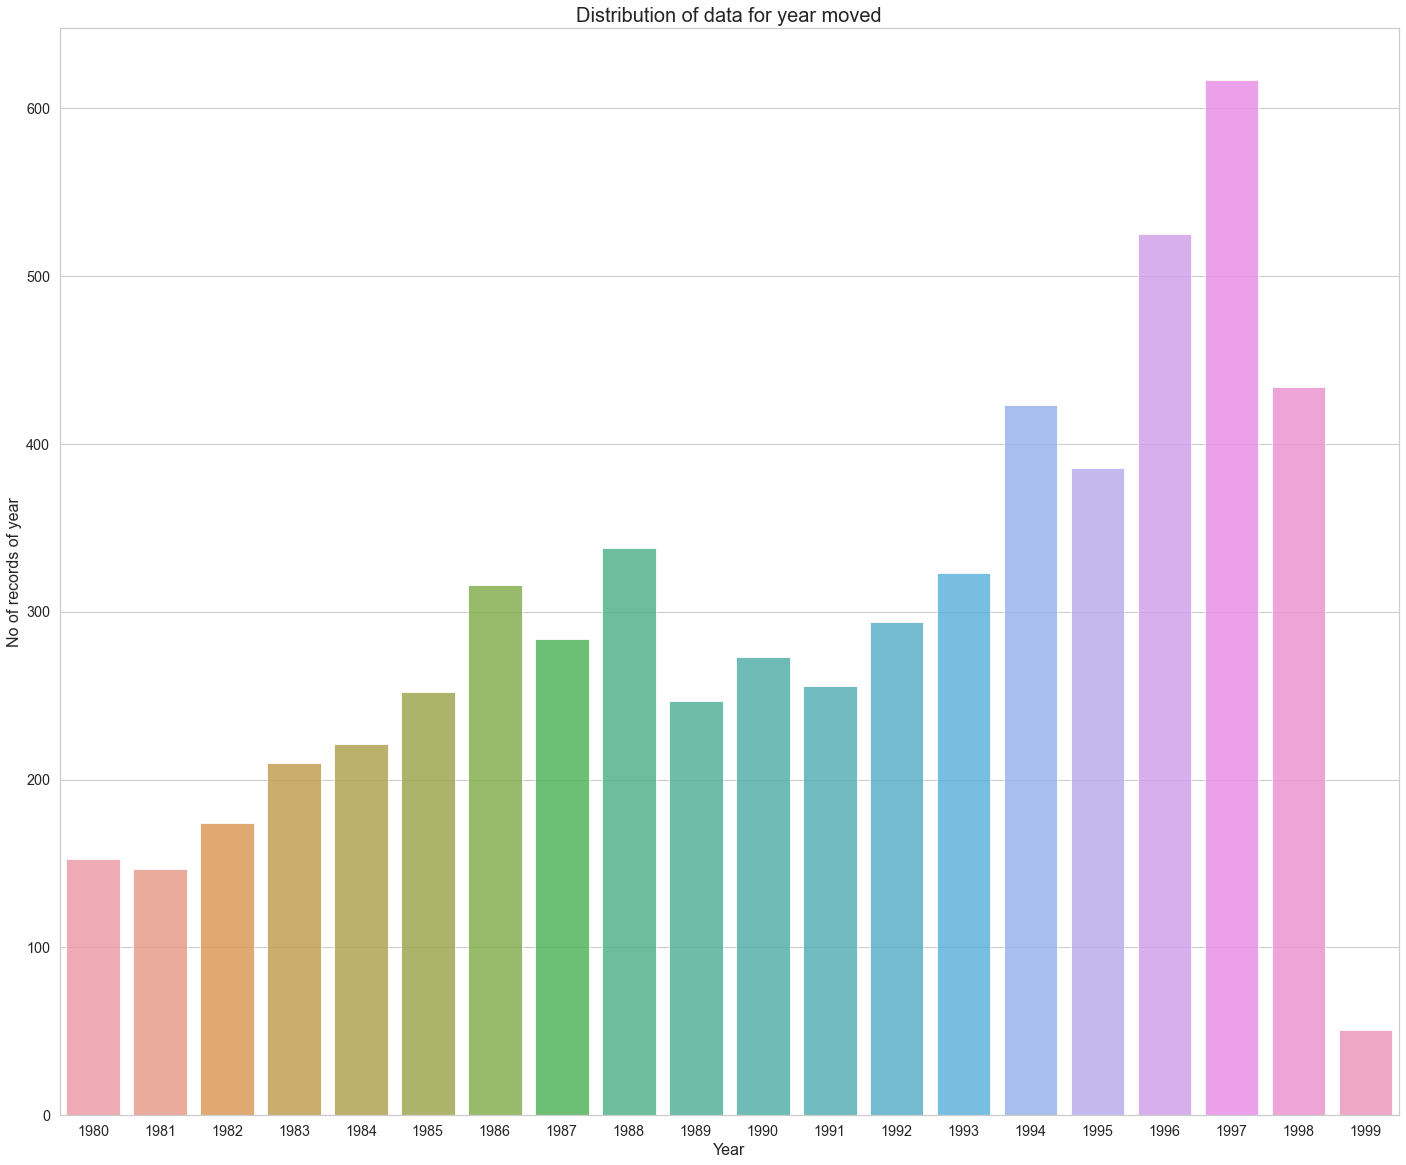

In [195]:
plt.figure(figsize=(24,20))
#df_train.year_last_moved.value_counts().sort_index(ascending=False).plot(kind='bar')
year_count = df_train['year_last_moved'].value_counts().sort_index(ascending=False)
year_count = year_count[0:20,]
sns.barplot(year_count.index, year_count.values,alpha=0.8)
plt.title("Distribution of data for year moved", fontsize=20)
plt.xlabel('Year' , fontsize=16)
plt.ylabel('No of records of year', fontsize=16)
plt.show()

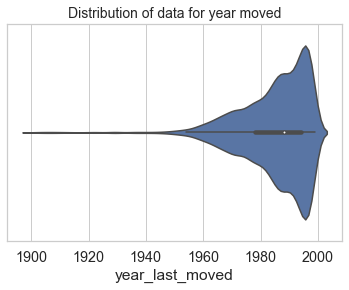

In [196]:
sns.violinplot(df_train['year_last_moved'], orient='vertical')
plt.title("Distribution of data for year moved", fontsize=14)
plt.show()

In [197]:
df_train.groupby(['year_last_moved','Revenue_Grid'])['REF_NO'].count().reset_index()

,year_last_moved,Revenue_Grid,REF_NO
0,1901,2,2
1,1902,2,2
2,1903,2,1
3,1904,2,2
4,1905,2,3
...,...,...,...
141,1997,2,563
142,1998,1,44
143,1998,2,390
144,1999,1,3


In [198]:
 # replace strin zero with actual 0 , treat 4+ as 4  & convert data type to number
df_train['children']=df_train['children'].replace('Zero',0)
df_train['children']=df_train['children'].replace('4+',4) 
df_train.children.value_counts()
df_train['children']=df_train['children'].astype(int)
df_train.children.value_counts()

0    4991
1    1474
2    1271
3     375
4      13
Name: children, dtype: int64

In [199]:
# calculate the percentage of data in each group in children feature
for clas in df_train.children.unique():
    perct = (((df_train[df_train['children'] == clas]['children'].count())/(df_train['children'].count()))*100).round()
    print('percentage of {} childer {}'.format(clas,perct))

percentage of 2 childer 16.0
percentage of 0 childer 61.0
percentage of 1 childer 18.0
percentage of 3 childer 5.0
percentage of 4 childer 0.0


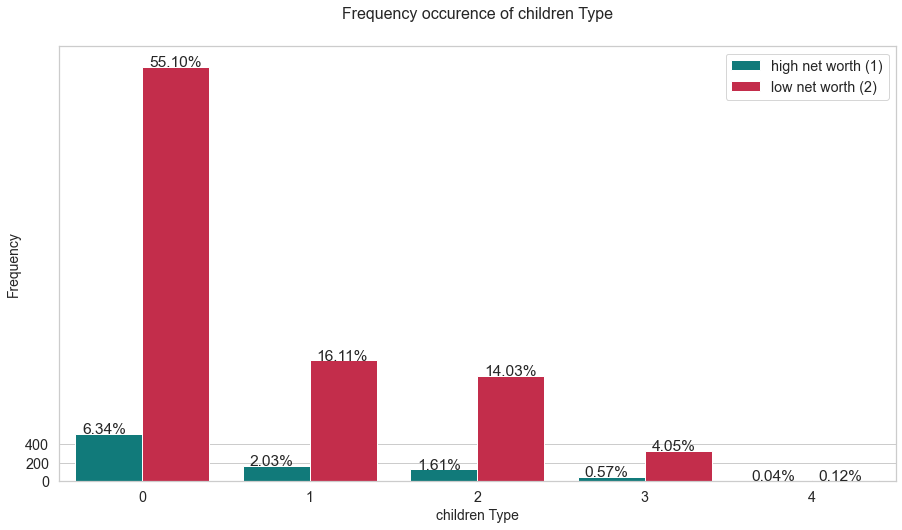

In [200]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'children',  data = df_train, hue = 'Revenue_Grid', palette = ['darkcyan', 'crimson'])

total = df_train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500, 200))
plt.xlabel('children Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['high net worth (1)','low net worth (2)'], loc = 'upper right')
plt.title('Frequency occurence of children Type', y=1.05, size = 16)
plt.show()

 from the above observation we can combine 3,4 childer group into one group 

In [201]:
# replace unknow values age band with mode 45-50 
df_train.age_band.value_counts().sort_values(ascending=False)
df_train['age_band']=df_train['age_band'].replace('Unknown','45-50') 
df_train['age_band']=df_train['age_band'].replace('71+','71-99') 
df_train.age_band.value_counts() # we can convert ageband to lessar groups 

45-50    1142
41-45     903
36-40     895
55-60     865
31-35     840
51-55     833
26-30     735
61-65     700
65-70     468
22-25     356
71-99     337
18-21      50
Name: age_band, dtype: int64

In [202]:
# calculate the percentage of data in each group in age_band feature
for clas in df_train.age_band.unique():
    perct = (((df_train[df_train['age_band'] == clas]['age_band'].count())/(df_train['age_band'].count()))*100).round()
    print('percentage of {} age_band is {}'.format(clas,perct))

percentage of 31-35 age_band is 10.0
percentage of 45-50 age_band is 14.0
percentage of 36-40 age_band is 11.0
percentage of 55-60 age_band is 11.0
percentage of 61-65 age_band is 9.0
percentage of 65-70 age_band is 6.0
percentage of 41-45 age_band is 11.0
percentage of 51-55 age_band is 10.0
percentage of 26-30 age_band is 9.0
percentage of 22-25 age_band is 4.0
percentage of 71-99 age_band is 4.0
percentage of 18-21 age_band is 1.0


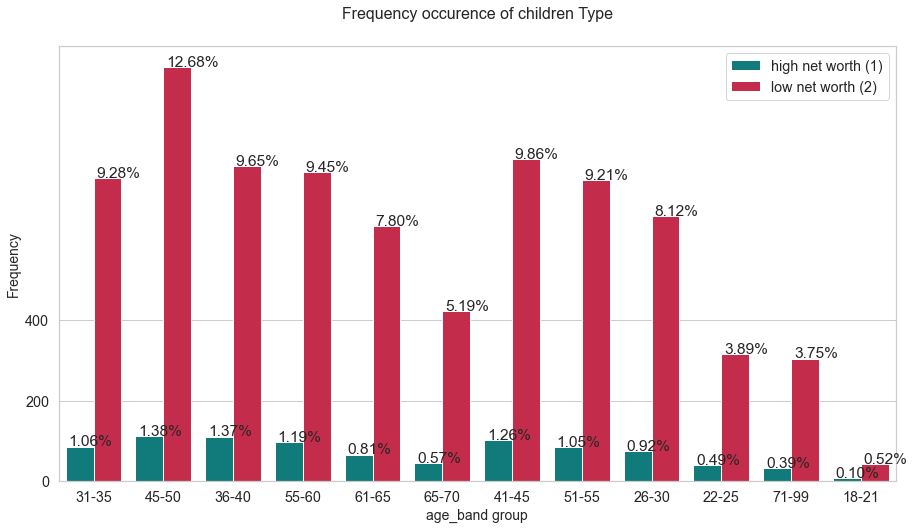

In [203]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'age_band',  data = df_train, hue = 'Revenue_Grid', palette = ['darkcyan', 'crimson'])

total = df_train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500, 200))
plt.xlabel('age_band group', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['high net worth (1)','low net worth (2)'], loc = 'upper right')
plt.title('Frequency occurence of children Type', y=1.05, size = 16)
plt.show()

Age band feature we can also convert into lessar groups

In [204]:
#replace unknow values with maximum class name

df_train['status']=df_train['status'].replace('Unknown','Partner') 
df_train.status.value_counts()

Partner                 6164
Single/Never Married     881
Divorced/Separated       569
Widowed                  510
Name: status, dtype: int64

In [205]:
# calculate the percentage of data in each group in status feature

for clas in df_train.status.unique():
    perct = (((df_train[df_train['status'] == clas]['status'].count())/(df_train['status'].count()))*100).round()
    print('percentage of {} status is {}'.format(clas,perct))

percentage of Partner status is 76.0
percentage of Divorced/Separated status is 7.0
percentage of Single/Never Married status is 11.0
percentage of Widowed status is 6.0


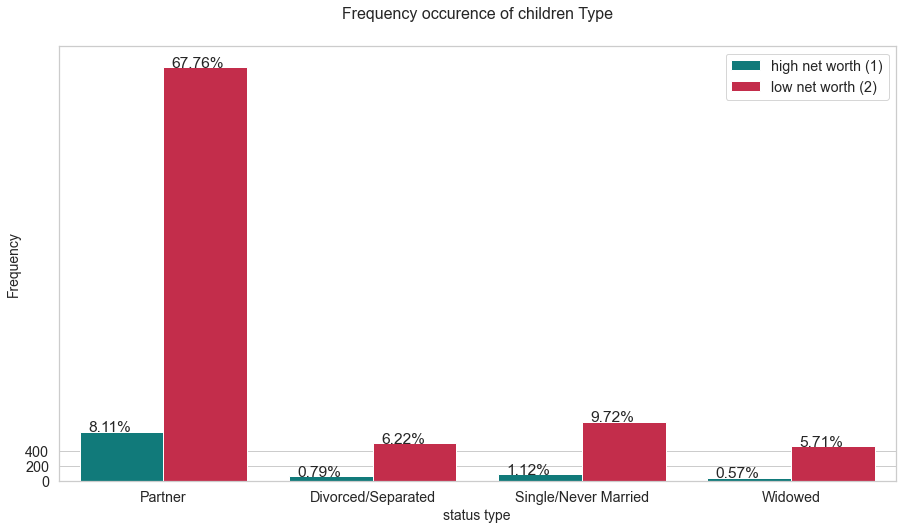

In [206]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'status',  data = df_train, hue = 'Revenue_Grid', palette = ['darkcyan', 'crimson'])

total = df_train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500, 200))
plt.xlabel('status type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['high net worth (1)','low net worth (2)'], loc = 'upper right')
plt.title('Frequency occurence of children Type', y=1.05, size = 16)
plt.show()

In [207]:
df_train.occupation.value_counts()
df_train['occupation']=df_train['occupation'].replace('Unknown','Professional')

In [208]:
# calculate the percentage of data from each group for occupation feature
for clas in df_train.occupation.unique():
    perct = (((df_train[df_train['occupation'] == clas]['occupation'].count())/(df_train['occupation'].count()))*100).round()
    print('percentage of {} occupation is {}'.format(clas,perct))

percentage of Professional occupation is 30.0
percentage of Secretarial/Admin occupation is 18.0
percentage of Manual Worker occupation is 6.0
percentage of Housewife occupation is 12.0
percentage of Retired occupation is 22.0
percentage of Other occupation is 5.0
percentage of Business Manager occupation is 7.0
percentage of Student occupation is 1.0


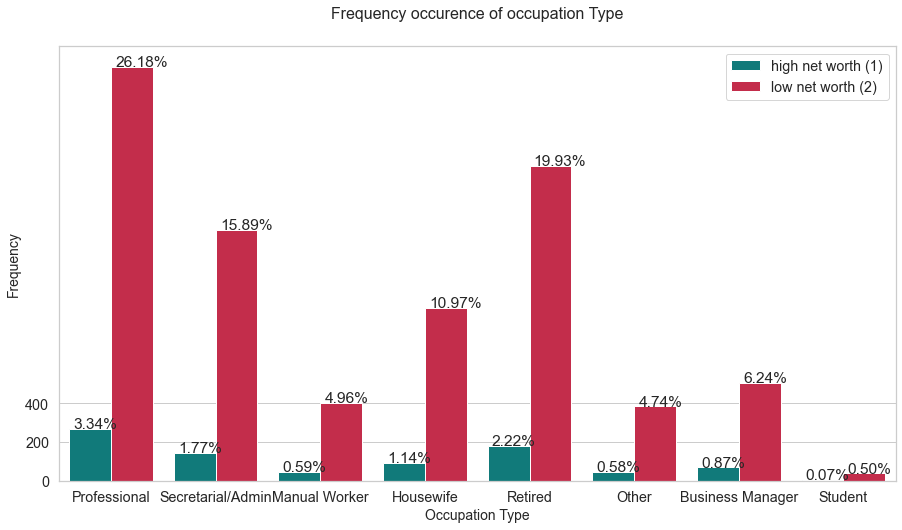

In [209]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'occupation',  data = df_train, hue = 'Revenue_Grid', palette = ['darkcyan', 'crimson'])

total = df_train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500, 200))
plt.xlabel('Occupation Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['high net worth (1)','low net worth (2)'], loc = 'upper right')
plt.title('Frequency occurence of occupation Type', y=1.05, size = 16)
plt.show()

In [210]:
df_train.occupation_partner.value_counts()
df_train['occupation_partner']=df_train['occupation_partner'].replace('Unknown','Other')

In [211]:
# calculate the percentage of data from each group for occupation_partner feature
for clas in df_train.occupation_partner.unique():
    perct = (((df_train[df_train['occupation_partner'] == clas]['occupation_partner'].count())/(df_train['occupation_partner'].count()))*100).round()
    print('percentage of {} occupation_partner is {}'.format(clas,perct))

percentage of Professional occupation_partner is 20.0
percentage of Manual Worker occupation_partner is 15.0
percentage of Business Manager occupation_partner is 7.0
percentage of Secretarial/Admin occupation_partner is 6.0
percentage of Retired occupation_partner is 19.0
percentage of Housewife occupation_partner is 5.0
percentage of Other occupation_partner is 27.0
percentage of Student occupation_partner is 0.0


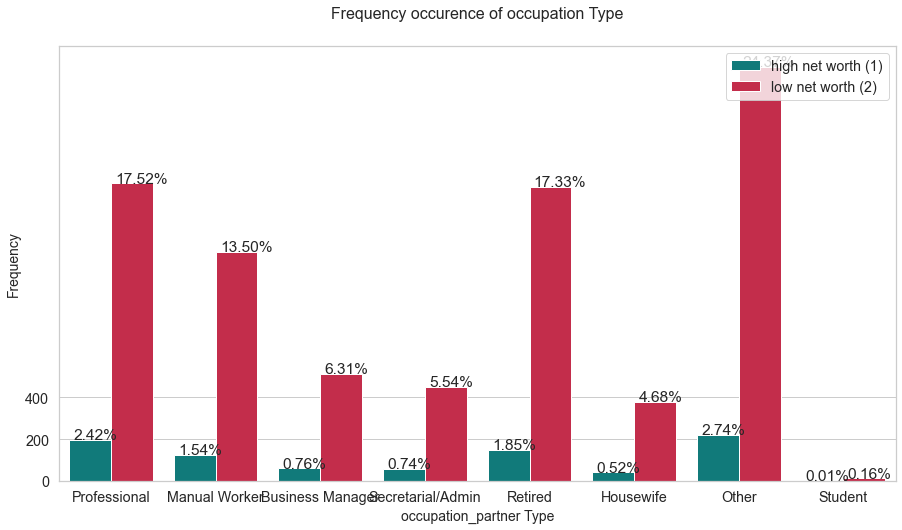

In [212]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'occupation_partner',  data = df_train, hue = 'Revenue_Grid', palette = ['darkcyan', 'crimson'])

total = df_train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500, 200))
plt.xlabel('occupation_partner Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['high net worth (1)','low net worth (2)'], loc = 'upper right')
plt.title('Frequency occurence of occupation Type', y=1.05, size = 16)
plt.show()

In [213]:
df_train.home_status.value_counts()
df_train['home_status']=df_train['home_status'].replace('Unclassified','Own Home')

In [214]:
# calculate the percentage of data from each group for home_status feature
for clas in df_train.home_status.unique():
    perct = (((df_train[df_train['home_status'] == clas]['home_status'].count())/(df_train['home_status'].count()))*100).round()
    print('percentage of {} home_status is {}'.format(clas,perct))

percentage of Own Home home_status is 93.0
percentage of Rent Privately home_status is 3.0
percentage of Rent from Council/HA home_status is 3.0
percentage of Live in Parental Hom home_status is 1.0


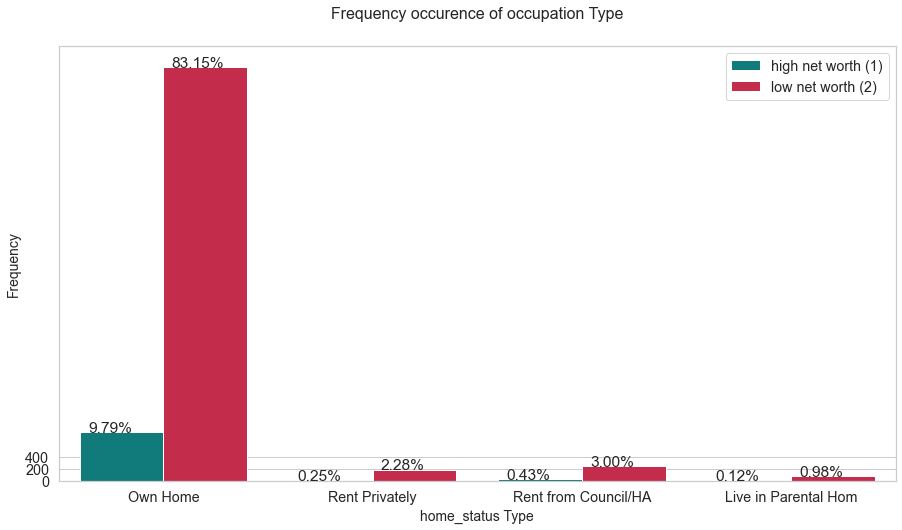

In [215]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'home_status',  data = df_train, hue = 'Revenue_Grid', palette = ['darkcyan', 'crimson'])

total = df_train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500, 200))
plt.xlabel('home_status Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['high net worth (1)','low net worth (2)'], loc = 'upper right')
plt.title('Frequency occurence of occupation Type', y=1.05, size = 16)
plt.show()

In [216]:
#rearrange the group names 
df_train.family_income.value_counts()

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64

In [217]:
# calculate the percentage of data from each group for family_income feature
for clas in df_train.family_income.unique():
    perct = (((df_train[df_train['family_income'] == clas]['family_income'].count())/(df_train['family_income'].count()))*100).round()
    print('percentage of {} family_income is {}'.format(clas,perct))

percentage of >=35,000 family_income is 25.0
percentage of <22,500, >=20,000 family_income is 6.0
percentage of <25,000, >=22,500 family_income is 8.0
percentage of <30,000, >=27,500 family_income is 10.0
percentage of <20,000, >=17,500 family_income is 6.0
percentage of <27,500, >=25,000 family_income is 12.0
percentage of < 4,000 family_income is 3.0
percentage of <15,000, >=12,500 family_income is 6.0
percentage of <17,500, >=15,000 family_income is 6.0
percentage of < 8,000, >= 4,000 family_income is 4.0
percentage of <12,500, >=10,000 family_income is 7.0
percentage of <10,000, >= 8,000 family_income is 6.0
percentage of Unknown family_income is 1.0


In [218]:
#sns.pairplot(df_train, hue='Revenue_Grid', dropna=True, markers=['o','s'])
#plt.title("Pair Plot");

In [219]:
df_train.Revenue_Grid.value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

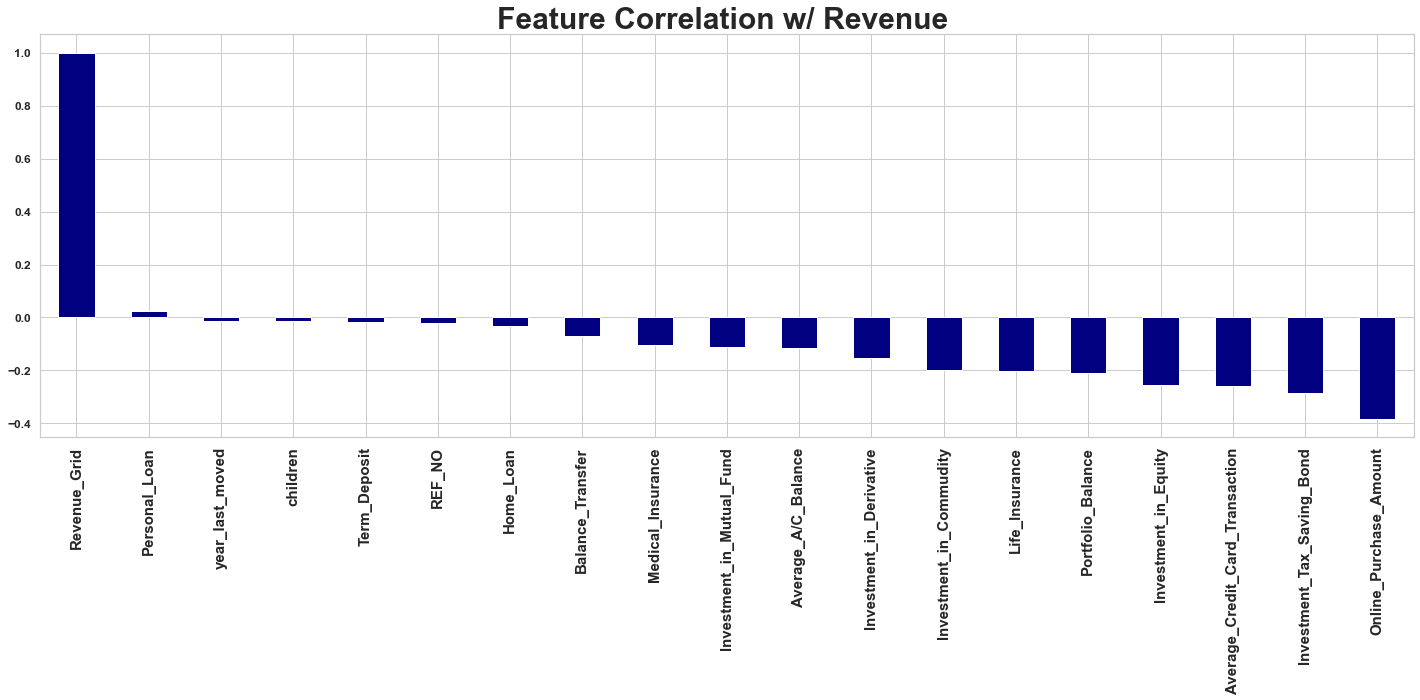

In [220]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
df_train.corr()['Revenue_Grid'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Revenue ', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()


<AxesSubplot:>

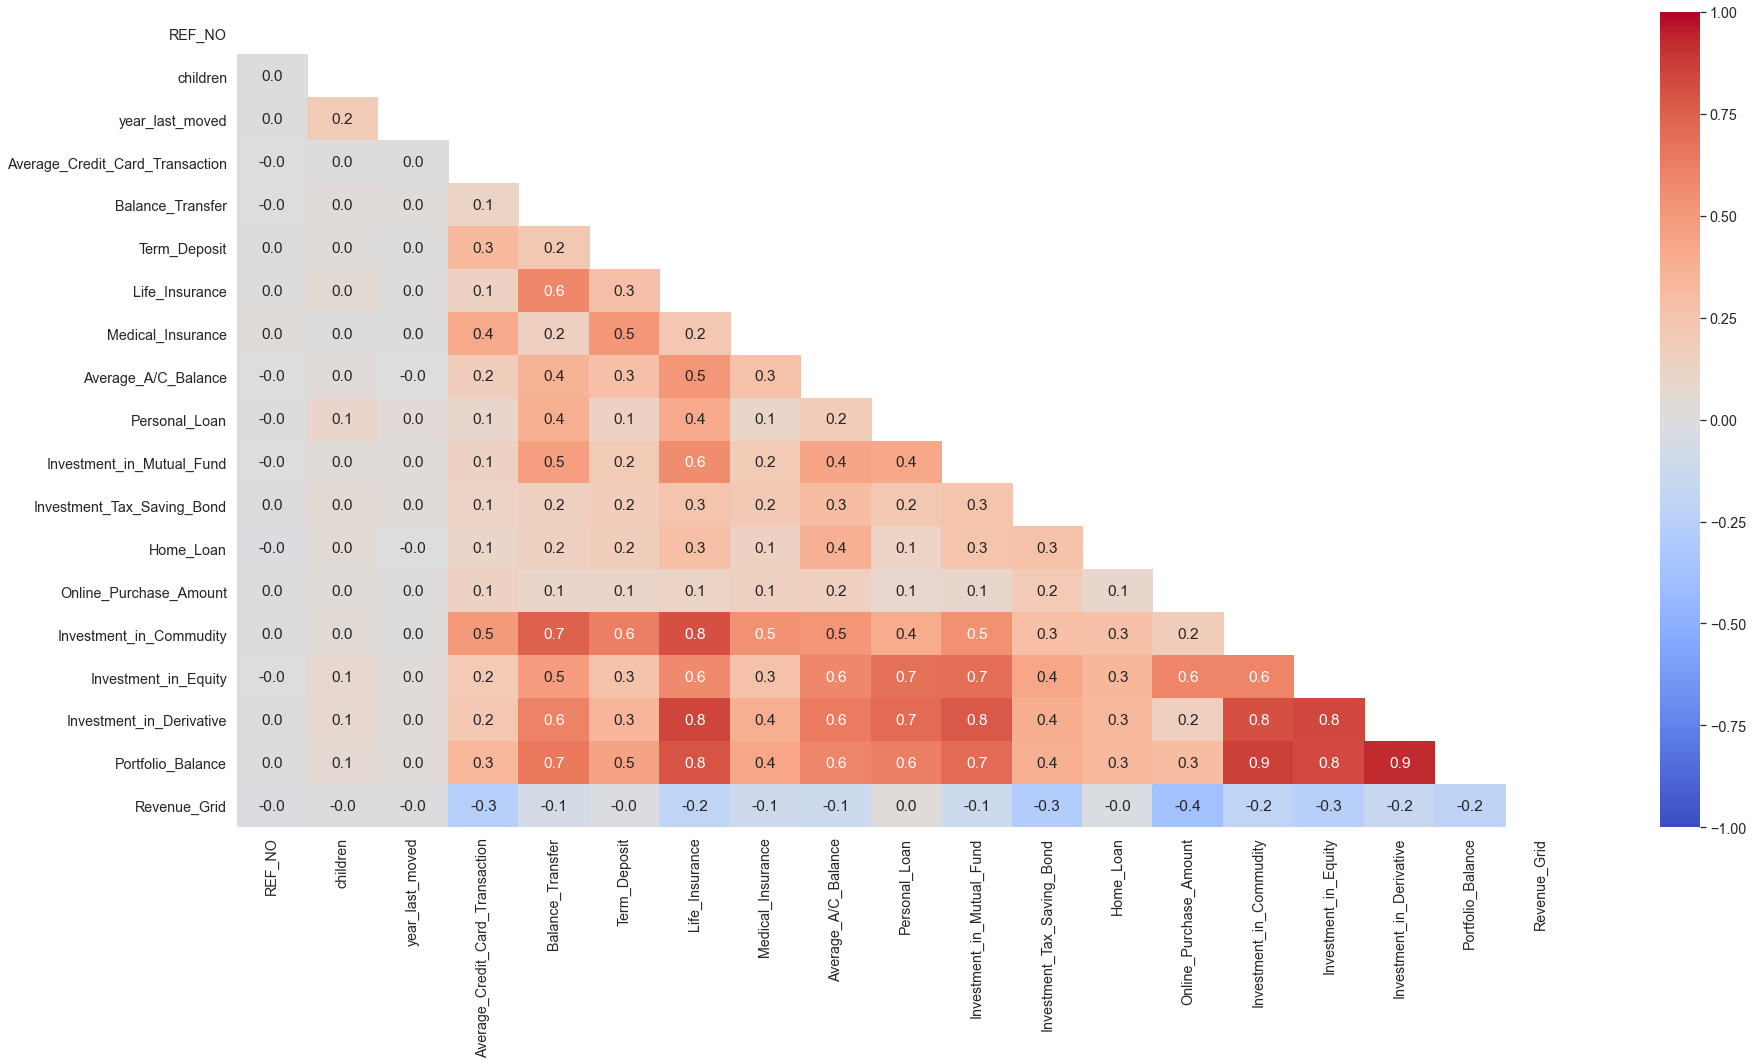

In [221]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))

# Generate correlation matrix heat map
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [222]:
#sns.pairplot(df_train, hue='Revenue_Grid')

In [223]:
df_train.corr()

,REF_NO,children,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,1.000000,0.009778,0.000217,-0.003218,-0.006604,0.003851,0.010882,0.019814,-0.003665,-0.008298,-0.003864,0.006365,-0.016627,0.004514,0.005642,-0.004075,0.002685,0.002762,-0.019852
children,0.009778,1.000000,0.195809,0.005963,0.028426,0.018534,0.047270,0.008443,0.023896,0.096865,0.030664,0.049536,0.039695,0.022017,0.039333,0.074177,0.070616,0.058857,-0.011908
year_last_moved,0.000217,0.195809,1.000000,0.002791,0.017162,0.006972,0.013034,0.005454,-0.000989,0.036224,0.017927,0.029262,-0.002139,0.013426,0.015540,0.029874,0.025276,0.023440,-0.011641
Average_Credit_Card_Transaction,-0.003218,0.005963,0.002791,1.000000,0.122762,0.317612,0.142606,0.416773,0.178150,0.089357,0.147438,0.131641,0.103417,0.135466,0.494653,0.208564,0.227267,0.334657,-0.260559
Balance_Transfer,-0.006604,0.028426,0.017162,0.122762,1.000000,0.225434,0.579267,0.162104,0.364480,0.390466,0.476061,0.152481,0.155322,0.103240,0.745051,0.482565,0.603648,0.655522,-0.068647
Term_Deposit,0.003851,0.018534,0.006972,0.317612,0.225434,1.000000,0.277802,0.509060,0.274553,0.141514,0.200841,0.181591,0.179143,0.102339,0.617357,0.263169,0.348750,0.451947,-0.017412
Life_Insurance,0.010882,0.047270,0.013034,0.142606,0.579267,0.277802,1.000000,0.231832,0.507877,0.411186,0.557926,0.257747,0.281339,0.117841,0.806732,0.572773,0.845890,0.792836,-0.201998
Medical_Insurance,0.019814,0.008443,0.005454,0.416773,0.162104,0.509060,0.231832,1.000000,0.266829,0.101725,0.202282,0.215206,0.144905,0.149324,0.545814,0.267200,0.382948,0.433584,-0.102217
Average_A/C_Balance,-0.003665,0.023896,-0.000989,0.178150,0.364480,0.274553,0.507877,0.266829,1.000000,0.193468,0.437742,0.302556,0.377556,0.160302,0.517854,0.580203,0.637153,0.599855,-0.114258
Personal_Loan,-0.008298,0.096865,0.036224,0.089357,0.390466,0.141514,0.411186,0.101725,0.193468,1.000000,0.424295,0.224014,0.125360,0.079820,0.403742,0.685400,0.703672,0.618259,0.022841


In [224]:
#post_code,post_area are with more unique values we can drop these features & also REF_NO
df_train.drop(columns=['post_code','post_area','REF_NO'], axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   int32  
 1   age_band                         8124 non-null   object 
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   object 
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   year_last_moved                  8124 non-null   int64  
 10  TVarea                           8124 non-null   object 
 11  Average_Credit_Card_Transaction  8124 non-null   float64
 12  Balance_Transfer    

In [225]:
df_train.self_employed.value_counts()

No     7543
Yes     581
Name: self_employed, dtype: int64

In [226]:
df_train['self_employed']=df_train['self_employed'].replace('Yes',1)
df_train['self_employed']=df_train['self_employed'].replace('No',0)
df_train['self_employed_partner']=df_train['self_employed_partner'].replace('Yes',1)
df_train['self_employed_partner']=df_train['self_employed_partner'].replace('No',0)

In [227]:
df_train.TVarea.value_counts()

Central          1294
Carlton          1237
Meridian          977
Yorkshire         847
Granada           824
HTV               683
Anglia            597
Tyne Tees         433
Scottish TV       406
TV South West     286
Grampian          175
Unknown           154
Ulster            135
Border             76
Name: TVarea, dtype: int64

In [228]:
df_train.gender.value_counts()

Female     6106
Male       1987
Unknown      31
Name: gender, dtype: int64

In [229]:
df_train.region.value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

In [230]:
#df_train=df_train.drop(df_train[df_train['region']=='Channel Islands'].index, inplace=True)

df_train.drop(df_train[df_train['region']=='Channel Islands'].index, inplace=True)

In [231]:
df_train.region.value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Name: region, dtype: int64

### EDA Quiz answers

**What is the maximum amount of personal loan taken by a customer in the train data before preprocessing?**

In [232]:
df_train.sort_values (by=['Personal_Loan'], ascending=False)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
3621,1,41-45,Partner,Professional,Professional,Own Home,">=35,000",0,0,1988,Tyne Tees,0.00,2951.76,251.33,2930.41,21.96,197.90,4905.93,2561.27,9.48,0.00,0.00,Male,North,1231.09,1279.10,1771.16,4283.56,2
1979,0,51-55,Partner,Business Manager,Business Manager,Own Home,"<20,000, >=17,500",0,0,1982,TV South West,0.00,468.85,59.46,575.24,29.48,183.37,1309.08,404.15,27.97,14.48,512.81,Female,South West,226.61,408.64,421.55,1024.68,2
5878,0,51-55,Partner,Professional,Professional,Own Home,">=35,000",0,0,1969,HTV,87.43,41.37,188.43,734.10,12.47,211.33,1280.20,88.38,10.00,0.00,2.00,Female,Wales,212.76,265.32,389.41,862.32,2
7882,0,45-50,Single/Never Married,Business Manager,Professional,Own Home,">=35,000",0,1,1985,Carlton,0.00,601.85,339.25,623.09,94.44,242.71,1173.96,288.76,45.39,55.68,90.95,Female,South East,331.73,316.24,411.39,1053.80,2
6216,1,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<27,500, >=25,000",0,0,1987,Granada,39.98,166.95,79.47,510.25,80.43,233.85,898.39,244.26,14.47,0.00,0.00,Female,North West,175.42,231.83,330.28,747.78,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,0,55-60,Widowed,Retired,Retired,Rent from Council/HA,"<10,000, >= 8,000",0,0,1969,Carlton,9.99,159.97,104.95,90.94,55.94,45.96,0.00,44.44,46.97,9.99,259.89,Female,North West,84.36,67.88,47.38,173.27,1
1396,0,41-45,Partner,Secretarial/Admin,Business Manager,Own Home,"<22,500, >=20,000",0,0,1998,Yorkshire,0.00,0.00,88.94,0.00,2.99,0.00,0.00,0.00,0.00,0.00,188.94,Female,East Midlands,18.39,31.49,0.50,34.38,1
1398,0,22-25,Single/Never Married,Professional,Other,Own Home,"<17,500, >=15,000",0,0,1998,Central,0.00,0.00,0.00,22.99,0.00,44.98,0.00,0.00,24.99,0.00,0.00,Female,East Midlands,4.60,11.66,15.49,33.54,2
1399,3,36-40,Partner,Professional,Manual Worker,Own Home,">=35,000",0,1,1981,Granada,0.00,0.00,0.00,62.98,0.00,52.94,0.00,122.37,0.00,0.00,55.45,Female,North West,12.60,38.46,39.72,96.30,2


**Which feature is highly skewed in the train data before preprocessing?**

In [233]:
for col in df_train.describe().columns:
    skew_status=df_train[col].mean()-df_train[col].median()
    print('difference between mean :{} and median : {} is : {} for feature :{}'.format(df_train[col].mean(),df_train[col].median(),skew_status,col))
   

difference between mean :0.6393644537504619 and median : 0.0 is : 0.6393644537504619 for feature :children
difference between mean :0.07131420125631235 and median : 0.0 is : 0.07131420125631235 for feature :self_employed
difference between mean :0.1129449439586156 and median : 0.0 is : 0.1129449439586156 for feature :self_employed_partner
difference between mean :1984.8338465328243 and median : 1988.0 is : -3.166153467175718 for feature :year_last_moved
difference between mean :23.262143121074182 and median : 0.0 is : 23.262143121074182 for feature :Average_Credit_Card_Transaction
difference between mean :46.05960709446872 and median : 17.49 is : 28.56960709446872 for feature :Balance_Transfer
difference between mean :27.288035472348916 and median : 0.0 is : 27.288035472348916 for feature :Term_Deposit
difference between mean :65.33127601921244 and median : 31.48 is : 33.851276019212435 for feature :Life_Insurance
difference between mean :18.826903559551862 and median : 0.01 is : 18.81

**Which region has the most number of customers in the train data before preprocessing?**

In [234]:
df_train.region.value_counts().sort_values(ascending=False)

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Name: region, dtype: int64

**Most of the customers in the bank are retired.?**

In [235]:
df_train.occupation.value_counts() #head()

Professional         2397
Retired              1799
Secretarial/Admin    1433
Housewife             984
Business Manager      577
Manual Worker         451
Other                 431
Student                47
Name: occupation, dtype: int64

<AxesSubplot:xlabel='Average_Credit_Card_Transaction'>

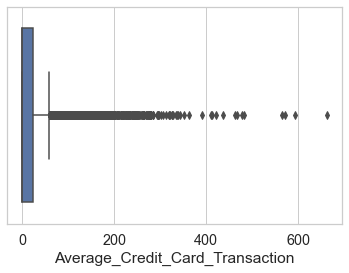

In [236]:
sns.boxplot(df_train['Average_Credit_Card_Transaction'])

**Before preprocessing, most of the customers of the bank in the train data are from the age band of:**

In [237]:
df_train.age_band.value_counts().sort_values(ascending=False)

45-50    1142
41-45     902
36-40     895
55-60     865
31-35     839
51-55     832
26-30     733
61-65     700
65-70     468
22-25     356
71-99     337
18-21      50
Name: age_band, dtype: int64

In [238]:

#Prepare Data for Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_train['age_band'] = labelencoder.fit_transform(df_train['age_band'])
df_train['children'] = labelencoder.fit_transform(df_train['children'])
df_train['family_income'] = labelencoder.fit_transform(df_train['family_income'])

#encoding unique values for year_last_moved column
#oe = OrdinalEncoder()
#df_train['year'] = oe.fit_transform(df_train['year_last_moved'])


In [239]:
df_train.head(5)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,2,3,Partner,Professional,Professional,Own Home,11,0,0,1981,Meridian,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,0,6,Partner,Secretarial/Admin,Professional,Own Home,11,0,0,1997,Meridian,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,1,4,Partner,Manual Worker,Manual Worker,Rent Privately,7,1,1,1996,HTV,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,2,3,Partner,Manual Worker,Manual Worker,Own Home,8,0,0,1990,Scottish TV,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,0,8,Partner,Housewife,Professional,Own Home,11,0,0,1989,Yorkshire,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [240]:
df_train = pd.get_dummies(df_train, columns=['occupation','status','occupation_partner','home_status','TVarea','gender','region'], drop_first=True)
df_train.head()

,children,age_band,family_income,self_employed,self_employed_partner,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,status_Partner,status_Single/Never Married,status_Widowed,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,2,3,11,0,0,1981,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,6,11,0,0,1997,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,2,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,4,7,1,1,1996,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,3,8,0,0,1990,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,8,11,0,0,1989,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [241]:
# before spliting the data set convert target features values into 0 & 1 
df_train.Revenue_Grid.unique()

array([2, 1], dtype=int64)

In [242]:
df_train['Revenue_Grid']=df_train['Revenue_Grid'].replace(2,0)

In [243]:
df_train.Revenue_Grid.unique()

array([0, 1], dtype=int64)

In [244]:
X = df_train.loc[:, df_train.columns != 'Revenue_Grid']
y = df_train.Revenue_Grid

In [245]:
print('Shape of train independent features  {}'.format(X.shape))
print('Shape of train target variable {}'.format(y.shape))

Shape of train independent features  (8119, 67)
Shape of train target variable (8119,)


In [246]:
#spilt dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [247]:
print('Shape of X train independent features  {}'.format(X_train.shape))
print('Shape of y train target variable {}'.format(y_train.shape))
print('Shape of X test independent features  {}'.format(X_test.shape))
print('Shape of y test target variable {}'.format(y_test.shape))

Shape of X train independent features  (6495, 67)
Shape of y train target variable (6495,)
Shape of X test independent features  (1624, 67)
Shape of y test target variable (1624,)


In [248]:
X_train.head(5)

,children,age_band,family_income,self_employed,self_employed_partner,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,status_Partner,status_Single/Never Married,status_Widowed,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
3329,0,7,5,0,0,1994,0.00,0.00,0.00,29.99,20.00,11.99,0.0,0.00,0.00,0.00,0.00,10.00,2.00,10.33,28.79,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3948,0,8,5,0,0,1971,0.00,29.99,8.99,0.00,6.99,47.95,0.0,7.49,13.46,29.96,0.00,9.19,16.48,12.65,85.11,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4327,1,3,9,0,1,1990,0.00,0.00,59.98,0.00,0.00,0.00,0.0,53.48,24.99,0.00,0.00,12.00,13.08,13.08,71.45,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
784,0,8,4,0,0,1984,0.00,58.48,0.00,214.42,0.00,177.36,0.0,144.33,11.48,4.99,37.49,54.58,62.61,91.27,187.98,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1929,0,9,1,0,0,1967,12.98,71.97,27.99,137.43,0.00,62.91,0.0,49.97,3.49,3.99,44.95,50.07,27.55,42.30,119.48,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [249]:
num_columns = ['Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Life_Insurance','Medical_Insurance','Average_A/C_Balance','Personal_Loan','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Home_Loan','Online_Purchase_Amount','Investment_in_Commudity','Investment_in_Equity','Investment_in_Equity','Investment_in_Derivative','Portfolio_Balance']

In [250]:
# Scaling only on numerical columns
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[num_columns] = ss.fit_transform(X_train[num_columns])

X_test[num_columns] = ss.transform(X_test[num_columns])


In [251]:
X_train.head(5)

,children,age_band,family_income,self_employed,self_employed_partner,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,status_Partner,status_Single/Never Married,status_Widowed,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
3329,0,7,5,0,0,1994,-0.463983,-0.632000,-0.509358,-0.384612,0.048190,-0.432212,-0.380289,-0.721502,-0.471656,-0.441868,-0.230219,-0.647972,-0.684463,-0.606869,-0.616272,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3948,0,8,5,0,0,1971,-0.463983,-0.214424,-0.342241,-0.712017,-0.372706,0.361966,-0.380289,-0.590446,0.574212,2.577743,-0.230219,-0.668271,-0.163409,-0.539588,-0.035485,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4327,1,3,9,0,1,1990,-0.463983,-0.632000,0.605623,-0.712017,-0.598844,-0.697011,-0.380289,0.214264,1.470115,-0.441868,-0.230219,-0.597850,-0.285756,-0.527118,-0.176351,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
784,0,8,4,0,0,1984,-0.463983,0.182267,-0.509358,1.628838,-0.598844,3.219988,-0.380289,1.803913,0.420362,0.061064,0.250976,0.469250,1.496552,1.740428,1.025336,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1929,0,9,1,0,0,1967,-0.199336,0.370100,0.010954,0.788326,-0.598844,0.692358,-0.380289,0.152848,-0.200476,-0.039724,0.346727,0.356225,0.234938,0.320276,0.318947,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [252]:
X_test.head(5)

,children,age_band,family_income,self_employed,self_employed_partner,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,status_Partner,status_Single/Never Married,status_Widowed,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
380,2,3,11,0,0,1998,0.045534,-0.632000,0.791515,0.346728,-0.598844,1.753101,0.153010,-0.721502,1.041978,1.068945,-0.230219,0.063512,0.325259,0.361746,0.134357,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3644,0,9,1,0,0,1969,-0.463983,-0.632000,-0.509358,-0.215615,1.211558,-0.476382,-0.380289,0.039114,0.226108,1.721044,-0.230219,-0.390094,-0.253370,-0.114441,-0.085191,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
273,2,5,9,0,1,1998,-0.463983,-0.183930,-0.333876,0.671950,-0.001308,1.076195,2.092985,0.733940,3.720363,1.218111,4.624344,0.037949,3.887357,1.630227,1.085869,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1030,3,3,11,0,0,1994,-0.463983,-0.631861,-0.509358,-0.483085,-0.081217,-0.034681,-0.380289,-0.721502,-0.471656,-0.441868,-0.230219,-0.713131,-0.576510,-0.582799,-0.775080,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
685,2,4,10,0,0,1988,-0.463780,2.534424,1.320750,1.485277,0.920716,2.095198,-0.380289,0.406037,-0.471656,-0.441868,-0.114958,1.978928,0.442209,1.216100,0.663995,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [253]:
# apply logestic regression model from sklearn

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [254]:
# Prediction
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [255]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [256]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [257]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred_test)

0.9488916256157636

In [258]:
accuracy_score(y_train, y_pred_train)

0.9458044649730561

In [259]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

,0,1
0,1428,20
1,63,113


In [260]:
#Precision and recall 

from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred_test)

0.849624060150376

Model detects 84% of correct class for test data

In [261]:
recall_score(y_test, y_pred_test)

0.6420454545454546

In [262]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1448
           1       0.85      0.64      0.73       176

    accuracy                           0.95      1624
   macro avg       0.90      0.81      0.85      1624
weighted avg       0.95      0.95      0.95      1624



**Interpretation:**
Of the entire test set, 97% of customers are classified as low networth are actually low networth customers . 73% of customers are classified as high net worth are actually high net worth customers.

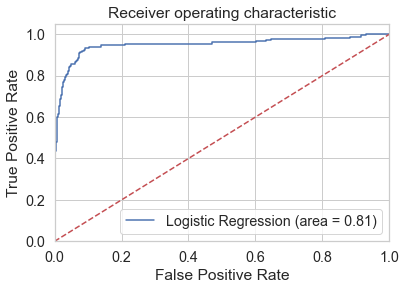

In [263]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Applying model for given test dataset

In [264]:
df_test = pd.read_csv('existing_base_test.csv')
df_train1 = pd.read_csv('existing_base_train.csv')
df_test1 = pd.read_csv('existing_base_test.csv')

In [265]:
cat_columns1 =[]
for col in df_test.columns.values:
    if (df_test[col].dtype=='object'):
        cat_columns1.append(col)

#print('Total Categorical Features : {}'.format(len(cat_columns)))        
#print('Categorical Features : {}'.format(cat_columns))
#check number of classes in each categorical feature 
for col in cat_columns1:
    print('No of classes in {} :  {}'.format(col,df_test[col].nunique()))

No of classes in children :  5
No of classes in age_band :  13
No of classes in status :  5
No of classes in occupation :  9
No of classes in occupation_partner :  9
No of classes in home_status :  5
No of classes in family_income :  13
No of classes in self_employed :  2
No of classes in self_employed_partner :  2
No of classes in TVarea :  14
No of classes in post_code :  2029
No of classes in post_area :  1146
No of classes in gender :  3
No of classes in region :  12


In [266]:
cat_columns2=[]
for col in df_train1.columns.values:
    if (df_train1[col].dtype=='object'):
        cat_columns2.append(col)
for col in cat_columns2:
    print('No of classes in {} :  {}'.format(col,df_train1[col].nunique()))        

No of classes in children :  5
No of classes in age_band :  13
No of classes in status :  5
No of classes in occupation :  9
No of classes in occupation_partner :  9
No of classes in home_status :  5
No of classes in family_income :  13
No of classes in self_employed :  2
No of classes in self_employed_partner :  2
No of classes in TVarea :  14
No of classes in post_code :  8050
No of classes in post_area :  1937
No of classes in gender :  3
No of classes in region :  13


Total number of class in region features are not same in both test & train data sets, so delere records in train dataset

In [267]:
arr1=df_train1.region.unique()
arr2=df_test.region.unique().sort()
np.setdiff1d(arr1,arr2)

array(['Channel Islands', 'East Anglia', 'East Midlands', 'Isle of Man',
       'North', 'North West', 'Northern Ireland', 'Scotland',
       'South East', 'South West', 'Unknown', 'Wales', 'West Midlands'],
      dtype=object)

In [271]:
df_test.TVarea.unique()

array(['Meridian', 'Anglia', 'HTV', 'Grampian', 'Tyne Tees', 'Yorkshire',
       'Granada', 'Carlton', 'Scottish TV', 'Central', 'Ulster',
       'TV South West', 'Unknown', 'Border'], dtype=object)

In [272]:
# replace strin zero with actual 0 , treat 4+ as 4  & convert data type to number
df_test['children']=df_test['children'].replace('Zero',0)
df_test['children']=df_test['children'].replace('4+',4) 
df_test.children.value_counts()
df_test['children']=df_test['children'].astype(int)
df_test.children.value_counts()

0    1217
1     374
2     336
3      98
4       6
Name: children, dtype: int64

In [273]:
# replace unknow values age band with mode 45-50 
df_test.age_band.value_counts().sort_values(ascending=False)
df_test['age_band']=df_test['age_band'].replace('Unknown','45-50') 
df_test['age_band']=df_test['age_band'].replace('71+','71-99') 
df_test.age_band.value_counts() # we can convert ageband to lessar groups

45-50    272
36-40    239
31-35    221
51-55    219
41-45    209
26-30    192
55-60    182
61-65    181
65-70    130
22-25    100
71-99     73
18-21     13
Name: age_band, dtype: int64

In [274]:
#replace unknown values with maximum class name
df_test['status']=df_test['status'].replace('Unknown','Partner') 
df_test.status.value_counts()

Partner                 1593
Single/Never Married     220
Divorced/Separated       110
Widowed                  108
Name: status, dtype: int64

In [275]:
#replace unknown values with maximum class name
df_test.occupation.value_counts()
df_test['occupation']=df_test['occupation'].replace('Unknown','Professional')

In [276]:
#replace unknown values with maximum name
df_test.occupation_partner.value_counts()
df_test['occupation_partner']=df_test['occupation_partner'].replace('Unknown','Other')

In [277]:
df_test.home_status.value_counts()
df_test['home_status']=df_test['home_status'].replace('Unclassified','Own Home')

In [278]:
#post_code,post_area are with more unique values we can drop these features & also REF_NO
df_test.drop(columns=['post_code','post_area','REF_NO'], axis=1, inplace=True)

In [279]:
df_test['self_employed']=df_test['self_employed'].replace('Yes',1)
df_test['self_employed']=df_test['self_employed'].replace('No',0)
df_test['self_employed_partner']=df_test['self_employed_partner'].replace('Yes',1)
df_test['self_employed_partner']=df_test['self_employed_partner'].replace('No',0)

In [280]:
#Prepare Data for Modeling
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_test['age_band'] = labelencoder.fit_transform(df_test['age_band'])
df_test['children'] = labelencoder.fit_transform(df_test['children'])
df_test['family_income'] = labelencoder.fit_transform(df_test['family_income'])

In [281]:
df_test = pd.get_dummies(df_test, columns=['occupation','status','occupation_partner','home_status','TVarea','gender','region'], drop_first=True)
df_test.head()

,children,age_band,family_income,self_employed,self_employed_partner,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,status_Partner,status_Single/Never Married,status_Widowed,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,gender_Male,gender_Unknown,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands
0,0,11,3,0,0,1973,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,3,11,0,0,1996,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,11,4,0,0,1958,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,44.39,32.62,43.86,98.38,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,5,0,0,1993,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,21.59,24.57,29.23,86.32,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,10,0,0,0,1976,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,53.66,16.22,32.89,102.99,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [282]:
num_columns = ['Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit','Life_Insurance','Medical_Insurance','Average_A/C_Balance','Personal_Loan','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Home_Loan','Online_Purchase_Amount','Investment_in_Commudity','Investment_in_Equity','Investment_in_Equity','Investment_in_Derivative','Portfolio_Balance']

In [283]:
# Scaling only on numerical columns
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_test[num_columns] = ss.fit_transform(df_test[num_columns])

In [284]:
df_test.shape

(2031, 67)

In [285]:
# Predictions for given test dataset
y_pred_train = logreg.predict(df_test)

In [286]:
y_pred_train.shape

(2031,)

In [287]:
df_train['Revenue_Grid']=df_train['Revenue_Grid'].replace(2,0)

In [288]:
submission=pd.DataFrame({"REF_NO":df_test1['REF_NO'],"Revenue_Grid":y_pred_train})

In [289]:
submission['Revenue_Grid']=submission['Revenue_Grid'].replace(0,2)

In [291]:
submission.Revenue_Grid.value_counts()

2    1878
1     153
Name: Revenue_Grid, dtype: int64

In [292]:
submission.shape

(2031, 2)

In [293]:
submission.to_csv('submission.csv',index=False,header=False)